In [1]:
%matplotlib inline
import os

import geopandas as gpd
import numpy as np

from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
def get_filename_label(path):
    fname = os.path.basename(path)
    return fname.partition("-")[0]

## Get the data

In [3]:
path1 = "data/002448-results-GWR_fixbw-COVID_cases_per_1000persons__over_both_periods-regen-BlackAsianHispanic-life_expect-econ_sect_shares.gpkg"

path2 = "data/006092-results-GWR_fixbw-COVID_cases_per_1000persons__over_period_1-BlackAsianHispanic.gpkg"

gwr1 = gpd.read_file(path1)
gwr1["ID"] = list(range(gwr1.shape[0]))

gwr2 = gpd.read_file(path2)
gwr2["ID"] = list(range(gwr2.shape[0]))

In [4]:
states = gpd.read_file("data/0-gwr-states.gpkg")
states = states.dissolve(
    by = "STATE_FIPS")[["STATE", "geometry"]].to_crs(gwr1.crs)

In [5]:
d = 50000
tile_inset = 1000

## A H3 (or 7-colouring) tile unit
This is a 7 colouring of the tiling by regular hexagons.

<AxesSubplot:>

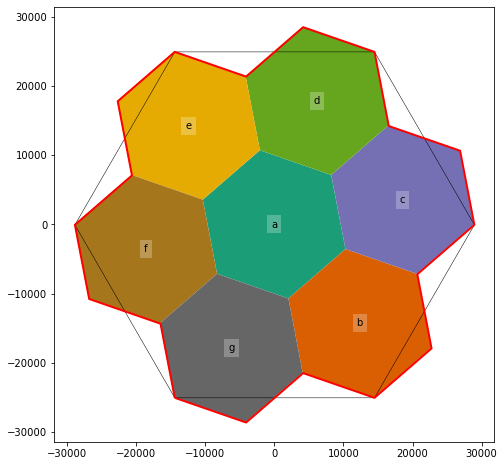

In [6]:
# make a base tile to start
hex_7_tile = TileUnit(tiling_type = "hex-colouring", n = 7,
                      spacing = d, crs = gwr1.crs)
hex_7_tile.plot()

Use it to tile the states

In [7]:
states_tiling = Tiling(hex_7_tile, states, id_var = "STATE")
states_hex7_layer = states_tiling.get_tiled_map(rotation = 10).map
states_hex7_layer.geometry = states_hex7_layer.geometry.buffer(
    1e-3, join_style = 2)
states_hex7_layer = states_hex7_layer.dissolve(
        by = "STATE", as_index = False)
states_hex7_layer.geometry = states_hex7_layer.geometry.buffer(-1e-3)

Now tile the data map, but this time apply a tile margin.

In [8]:
hex7_tiling = Tiling(hex_7_tile, gwr1, id_var = "ID", tile_margin = tile_inset)
hex7_map = hex7_tiling.get_tiled_map(rotation = 10)

Make up variable and colourmap lookups

In [9]:
betas7 = [n for n in gwr1.columns if "_beta_classified" in n]
hex7_map.variables = dict(zip(list("gbcdefa"), betas7))
hex7_map.colourmaps =  dict(zip(
    betas7, 7 * [{'associated with LESS covid': "#69A7CF",
                  'not significant': "#C7C7C7",
                  'associated with MORE covid': "#EF8A62"}]))
hex7_map.dpi = 150
hex7_map.figsize = (24, 18)

And make a map

<AxesSubplot:label='map'>

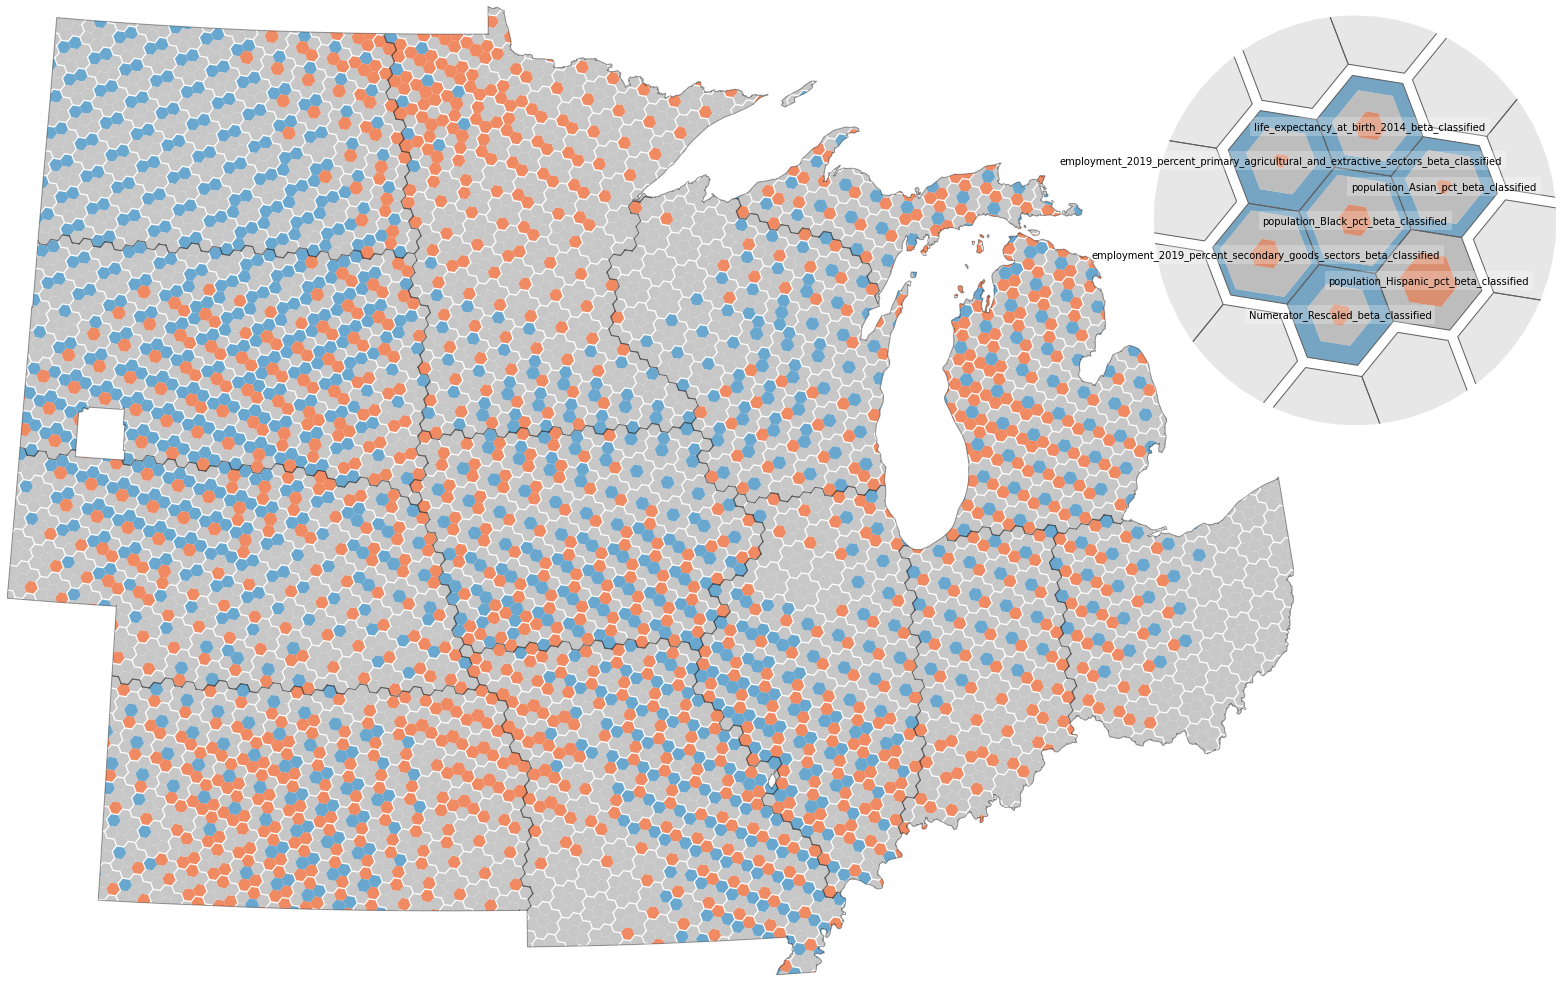

In [10]:
fig = hex7_map.render(
    legend_zoom = 1., legend_dx = -0.1, legend_dy = -0.125,
    use_ellipse = True, ellipse_magnification = 1)
states_hex7_layer.plot(ax = fig.get_axes()[0], fc = "#00000000", 
                       ec = "#00000060", lw = 1)

# fig.savefig(f"hex_{get_filename_label(path1)}.pdf")

## Hex 3-colouring tile unit
A 3-colourable tiling of regular hexagons. Not yet implemented, so make it by hand here.

<AxesSubplot:>

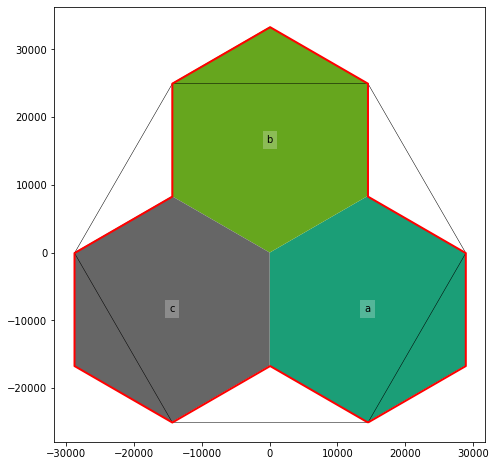

In [11]:
hex_3_tile = TileUnit(tiling_type = "hex-coloring", n = 3,
                      spacing = d, crs = gwr2.crs)
hex_3_tile.plot()

In [12]:
# this is the rotation of the 7-colouring
rotation = np.degrees(np.arctan(1 / 3 / np.sqrt(3)))

states_tiling = Tiling(hex_3_tile, states, id_var = "STATE")
states_hex3_layer = states_tiling.get_tiled_map(rotation = rotation + 10).map
states_hex3_layer.geometry = states_hex3_layer.geometry.buffer(
    1e-3, join_style = 2)
states_hex3_layer = states_hex3_layer.dissolve(
        by = "STATE", as_index = False)
states_hex3_layer.geometry = states_hex3_layer.geometry.buffer(-1e-3)

In [13]:
hex3_tiling = Tiling(hex_3_tile, gwr2, id_var = "ID", tile_margin = tile_inset)
hex3_map = hex3_tiling.get_tiled_map(rotation = rotation + 10)

In [14]:

betas3 = [n for n in gwr2.columns if "_beta_classified" in n]
hex3_map.variables = dict(zip(list("cab"), betas3))
hex3_map.colourmaps =  dict(zip(
    betas3, 3 * [{'associated with LESS covid': "#69A7CF",
                  'not significant': "#C7C7C7",
                  'associated with MORE covid': "#EF8A62"}]))
hex3_map.dpi = 150
hex3_map.figsize = (24, 18)

<AxesSubplot:label='map'>

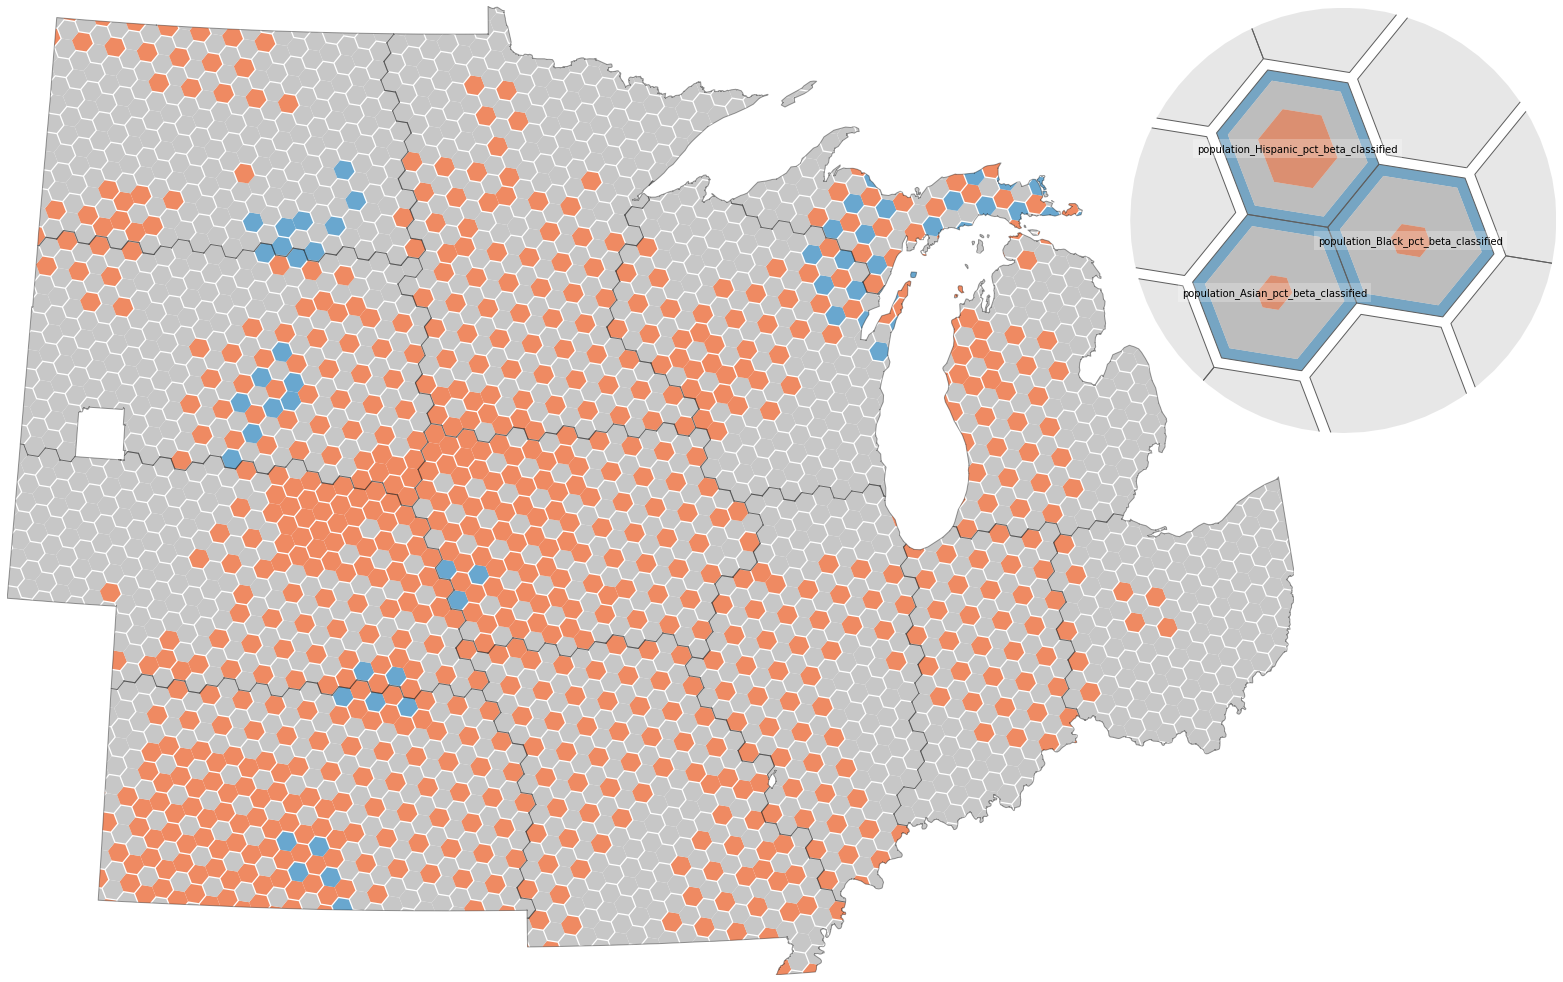

In [15]:
fig = hex3_map.render(legend_zoom = 1.0, legend_dx = -0.1, legend_dy = -0.125, 
                      use_ellipse = True, ellipse_magnification = 1.0)
states_hex3_layer.plot(ax = fig.get_axes()[0], fc = "#00000000", 
                       ec = "#00000060", lw = 1)

# fig.savefig(f"hex_{get_filename_label(path2)}.pdf")